In [52]:
import random
import networkx as nx
from matplotlib import pyplot as plt
from collections import Counter
import math
from utils.plotTools import plot_qwak
import os
import ast
import numpy as np

from scripts import load_list_from_file, write_list_to_file, load_or_generate_data, draw_graph, draw_graph_from_adjacency_matrix

# H graph implementation

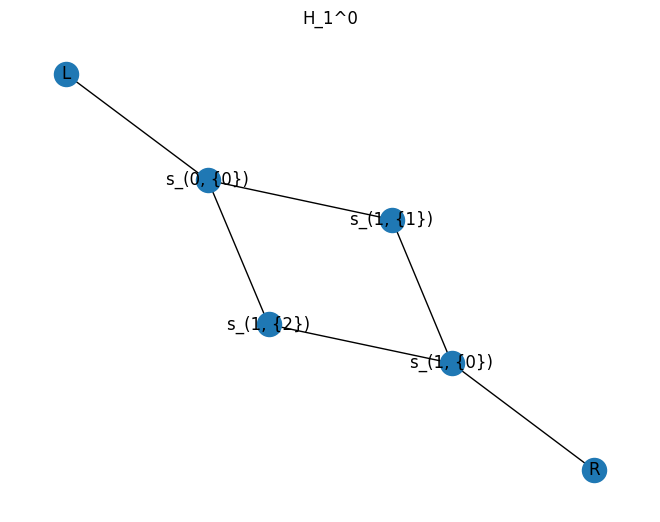

In [53]:
def create_graph(l, k):
    H = nx.MultiGraph()  # Multigraph is used to support multiple edges between the same nodes

    # add nodes and edges
    H.add_edge("L", f"s_{0, {k%3}}")
    for i in range(1, l+1):
        H.add_edge(f"s_{i-1, {k%3}}", f"s_{i, {(k+2)%3}}")
        H.add_edge(f"s_{i-1, {k%3}}", f"s_{i, {(k+1)%3}}")
        H.add_edge(f"s_{i, {(k+2)%3}}", f"s_{i, {k%3}}")
        H.add_edge(f"s_{i, {(k+1)%3}}", f"s_{i, {k%3}}")
    H.add_edge(f"s_{l, {k%3}}", "R")

    # add self-loops
    # for node in H.nodes():
    #     for _ in range(H.degree(node)):
    #         H.add_edge(node, node)  # multiple self-loops, each with weight 1

    return H

def plot_graph(H, title):
    plt.figure()
    nx.draw(H, with_labels=True)
    plt.title(title)

# Create and plot the graphs
H_1_0 = create_graph(1, 0)
plot_graph(H_1_0, "H_1^0")

# H_1_1 = create_graph(1, 1)
# plot_graph(H_1_1, "H_1^1")

# H_1_2 = create_graph(1, 2)
# plot_graph(H_1_2, "H_1^2")

plt.show()


 s_0,0 ===> c_0 ----- L  <=== R

Edges for i = 1
s_0,0 ===> c_0 ----- c_1 <=== s_1,2
s_0,0 ===> c_0 ----- b_1 <=== s_1,1
s_1,2 ===> c_1 ----- a_1 <=== s_1,0
s_1,1 ===> b_1 ----- a_1 <=== s_1,0

Edges for i = 2
s_1,0 ===> a_1 ----- c_2 <=== s_2,2
s_1,0 ===> a_1 ----- b_2 <=== s_2,1
s_2,2 ===> c_2 ----- a_2 <=== s_2,0
s_2,1 ===> b_2 ----- a_2 <=== s_2,0

s_0,0 ===> a_2 ----- R   <=== R

Self-loops: [1. 3. 2. 2. 4. 2. 2. 3. 1.]


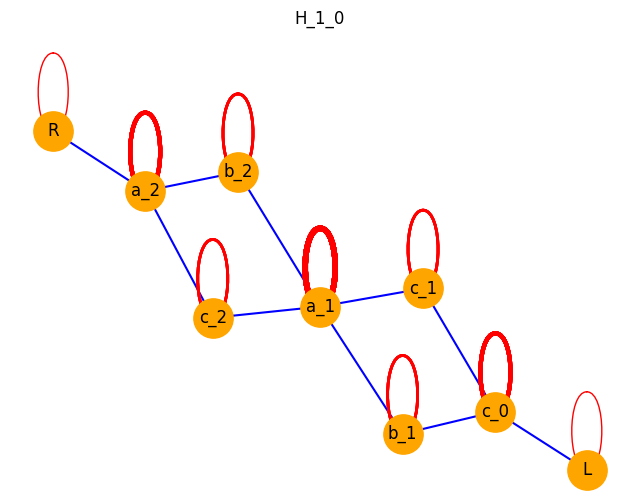

 s_0,1 ===> c_0 ----- L  <=== R

Edges for i = 1
s_0,1 ===> c_0 ----- b_1 <=== s_1,0
s_0,1 ===> c_0 ----- a_1 <=== s_1,2
s_1,0 ===> b_1 ----- c_1 <=== s_1,1
s_1,2 ===> a_1 ----- c_1 <=== s_1,1

Edges for i = 2
s_1,1 ===> c_1 ----- b_2 <=== s_2,0
s_1,1 ===> c_1 ----- a_2 <=== s_2,2
s_2,0 ===> b_2 ----- c_2 <=== s_2,1
s_2,2 ===> a_2 ----- c_2 <=== s_2,1

s_0,1 ===> c_2 ----- R   <=== R

Self-loops: [1. 3. 2. 2. 4. 2. 2. 3. 1.]


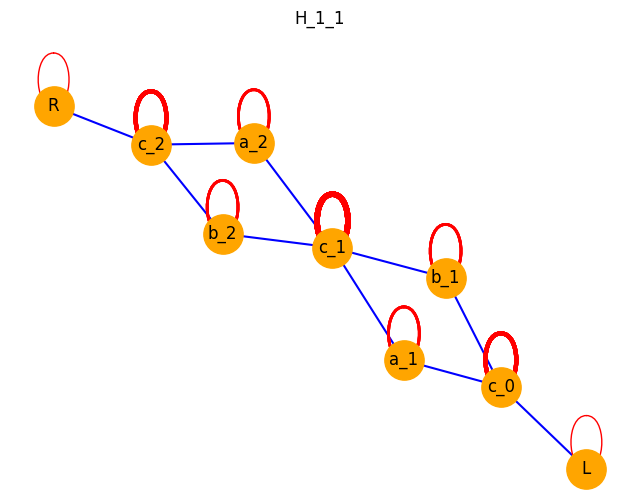

 s_0,2 ===> c_0 ----- L  <=== R

Edges for i = 1
s_0,2 ===> c_0 ----- a_1 <=== s_1,1
s_0,2 ===> c_0 ----- c_1 <=== s_1,0
s_1,1 ===> a_1 ----- b_1 <=== s_1,2
s_1,0 ===> c_1 ----- b_1 <=== s_1,2

Edges for i = 2
s_1,2 ===> b_1 ----- a_2 <=== s_2,1
s_1,2 ===> b_1 ----- c_2 <=== s_2,0
s_2,1 ===> a_2 ----- b_2 <=== s_2,2
s_2,0 ===> c_2 ----- b_2 <=== s_2,2

s_0,2 ===> b_2 ----- R   <=== R

Self-loops: [1. 3. 2. 2. 4. 2. 2. 3. 1.]


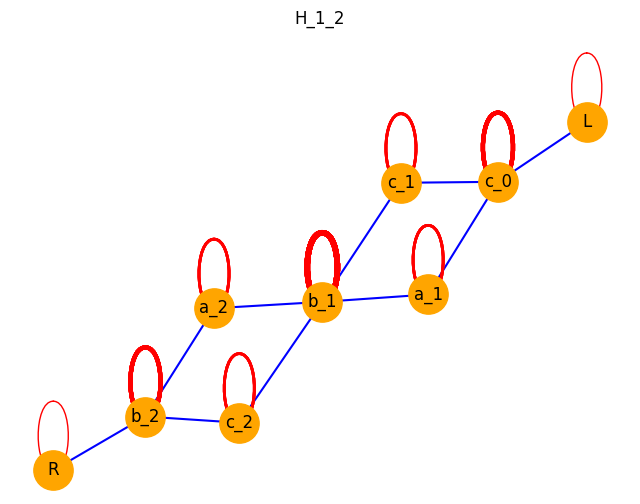

In [54]:
def create_vertex_mapping(l, k):
    #generate the characters 'a', 'b', 'c' cyclically based on the values of j and k.
    #The number 97 is the ASCII value for the character 'a', and (j+k)%3 generates thenumbers 0, 1, 2 in a cyclic manner.
    mapping = {f"s_{i},{j}": f"{chr(97 + (j+k)%3)}_{i}" for i in range(1, l+1) for j in range(3)}  # start range from 1 for i
    mapping.update({f"s_0,{j}": "c_0" for j in range(3)})  # handle s_0 separately
    mapping["L"] = "L"
    mapping["R"] = "R"
    return mapping

def create_graph(l, k):
    H = nx.MultiGraph()  # Multigraph is used to support multiple edges between the same nodes

    # get vertex mapping
    mapping = create_vertex_mapping(l, k)

    # add nodes and edges
    H.add_edge(mapping["L"], mapping[f"s_{0},{k%3}"])
    print(f' {f"s_{0},{k%3}"} ===> {mapping[f"s_{0},{k%3}"]} ----- {mapping[f"L"]}  <=== {mapping[f"R"]}')
    for i in range(1, l+1):
        print(f'\nEdges for i = {i}')
        H.add_edge(mapping[f"s_{i-1},{k%3}"], mapping[f"s_{i},{(k+2)%3}"])
        print(f'{f"s_{i-1},{k%3}"} ===> {mapping[f"s_{i-1},{k%3}"]} ----- {mapping[f"s_{i},{(k+2)%3}"]} <=== {f"s_{i},{(k+2)%3}"}')
        
        H.add_edge(mapping[f"s_{i-1},{k%3}"], mapping[f"s_{i},{(k+1)%3}"])
        # print(f'{f"s_{i-1},{k%3}"} ----- {f"s_{i},{(k+1)%3}"}\t {mapping[f"s_{i-1},{k%3}"]} ----- {mapping[f"s_{i},{(k+1)%3}"]}')
        print(f'{f"s_{i-1},{k%3}"} ===> {mapping[f"s_{i-1},{k%3}"]} ----- {mapping[f"s_{i},{(k+1)%3}"]} <=== {f"s_{i},{(k+1)%3}"}')
        
        
        H.add_edge(mapping[f"s_{i},{(k+2)%3}"], mapping[f"s_{i},{k%3}"])
        # print(f'{f"s_{i},{(k+2)%3}"} ----- {f"s_{i},{k%3}"}\t {mapping[f"s_{i},{(k+2)%3}"]} ----- {mapping[f"s_{i},{k%3}"]}')
        print(f'{f"s_{i},{(k+2)%3}"} ===> {mapping[f"s_{i},{(k+2)%3}"]} ----- {mapping[f"s_{i},{k%3}"]} <=== {f"s_{i},{k%3}"}')
        
        
        H.add_edge(mapping[f"s_{i},{(k+1)%3}"], mapping[f"s_{i},{k%3}"])
        # print(f'{f"s_{i},{(k+1)%3}"} ----- {f"s_{i},{k%3}"}\t {mapping[f"s_{i},{(k+1)%3}"]} ----- {mapping[f"s_{i},{k%3}"]}')
        print(f'{f"s_{i},{(k+1)%3}"} ===> {mapping[f"s_{i},{(k+1)%3}"]} ----- {mapping[f"s_{i},{k%3}"]} <=== {f"s_{i},{k%3}"}')

    H.add_edge(mapping[f"s_{l},{k%3}"], mapping["R"])
    # print(f'{f"s_{0},{k%3}"} ----- R \t\t {mapping[f"s_{l},{k%3}"]} ----- {mapping[f"R"]}')
    print(f'\n{f"s_{0},{k%3}"} ===> {mapping[f"s_{l},{k%3}"]} ----- R   <=== {mapping[f"R"]}')
    
    

    # add self-loops
    for node in H.nodes():
        for i in range(H.degree(node)):
            H.add_edge(node, node)  # multiple self-loops, each with weight 1
    # print(nx.to_numpy_array(H))
    print(f'\nSelf-loops: {nx.to_numpy_array(H).diagonal()}')
    
    return H

def plot_graph(H, title):
    plt.figure()
    nx.draw(H, with_labels=True)
    plt.title(title)
    
config = {
    'figsize': (10, 8),
    'k': 0.2,
    'draw_self_loops': False,
    'node_color': 'orange',
    'node_size': 800,
    'normal_edge_color': 'blue',
    'normal_edge_width': 1.5,
    'edge_style': 'solid',
    'self_loop_color': 'red',
    'title': 'H_1_0'
}

config1 = {
    'figsize': (10, 8),
    'k': 0.2,
    'draw_self_loops': False,
    'node_color': 'orange',
    'node_size': 800,
    'normal_edge_color': 'blue',
    'normal_edge_width': 1.5,
    'edge_style': 'solid',
    'self_loop_color': 'red',
    'title': 'H_1_1'
}

config2 = {
    'figsize': (10, 8),
    'k': 0.2,
    'draw_self_loops': False,
    'node_color': 'orange',
    'node_size': 800,
    'normal_edge_color': 'blue',
    'normal_edge_width': 1.5,
    'edge_style': 'solid',
    'self_loop_color': 'red',
    'title': 'H_1_2'
}

H_1_0 = create_graph(2, 0)
draw_graph(H_1_0, config=config)

H_1_1 = create_graph(2,1)
draw_graph(H_1_1, config=config1)

H_1_2 = create_graph(2, 2)
draw_graph(H_1_2, config=config2)

plt.show()